In [122]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib notebook

In [49]:
%store -r customer_indicators

# Clustering

In [126]:
rfm_log = customer_indicators[['RMonetary']].apply(np.log10, axis=1).round(3)
rfm_log['Delta'] = customer_indicators[['Delta']].apply(np.log10, axis=1).round(3)
rfm_log['Recency'] = customer_indicators['Recency']#.apply(np.log10, axis=1).round(3)

rfm_k = rfm_log[['Delta', 'Recency', 'RMonetary']]
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_k.values)

In [76]:
sse = []
silhouette = []
kmax = 9
for k in range(2, kmax):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled, kmeans.labels_))

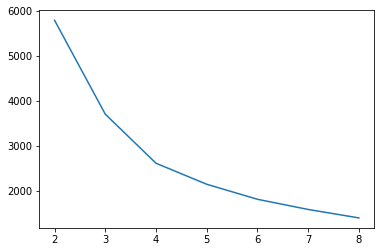

In [77]:
# Elbow curve.
ax = plt.plot(range(2, kmax), sse)
plt.show()

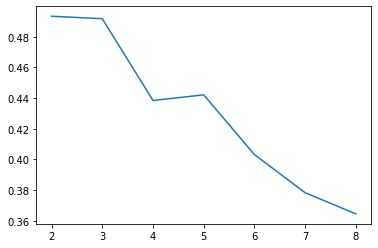

In [78]:
# Silhouette score.
ax = plt.plot(range(2, kmax), silhouette)
plt.show()

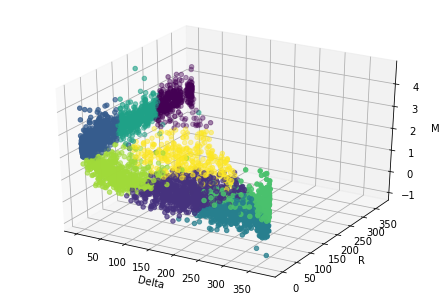

In [79]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_log['Delta'], rfm_log['Recency'], rfm_log['RMonetary'], c=kmeans.labels_)
ax.set_xlabel('Delta')
ax.set_ylabel('R')
ax.set_zlabel('M')
plt.show()

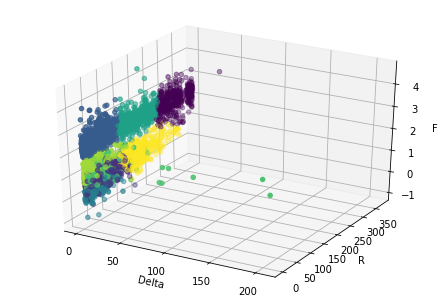

In [80]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(customer_indicators['Frequency'], rfm_log['Recency'], rfm_log['RMonetary'], c=kmeans.labels_)
ax.set_xlabel('Delta')
ax.set_ylabel('R')
ax.set_zlabel('F')
plt.show()

In [133]:
#rfm_den = rfm_log[['Frequency','Monetary','Recency']]
density = DBSCAN(eps=0.30, min_samples=7).fit(scaled)

<IPython.core.display.Javascript object>


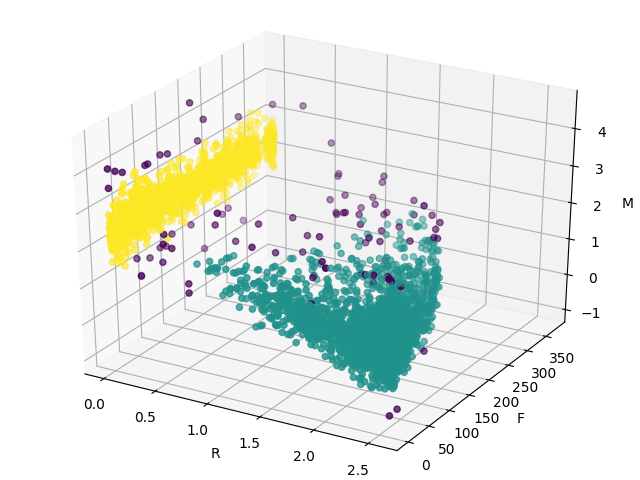

In [134]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_log['Delta'], rfm_log['Recency'], rfm_log['RMonetary'], c=density.labels_)
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
plt.show()

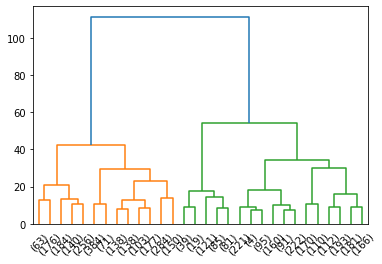

In [10]:
data_dist = pdist(scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')